WEIGHTS FOR THE CLOSED FORM SOLUTION ARE (w0, w1):  [ 9.06136891 -0.75886584]
WEIGHTS FOR THE GRADIENT DESCENT ALGORITHM ARE (w0, w1):  [ 8.68777329 -0.70790478]


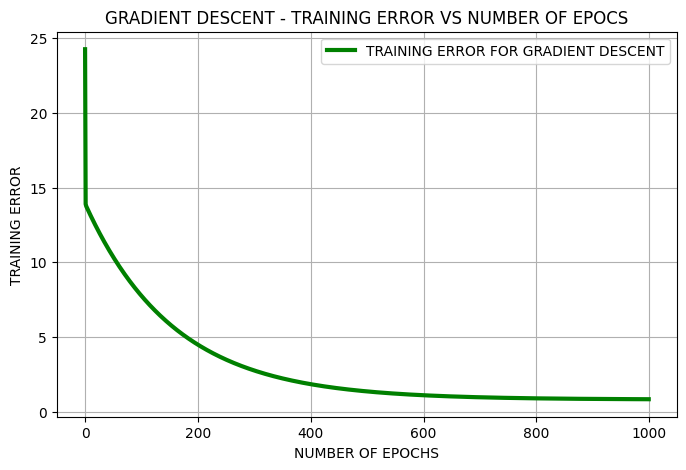

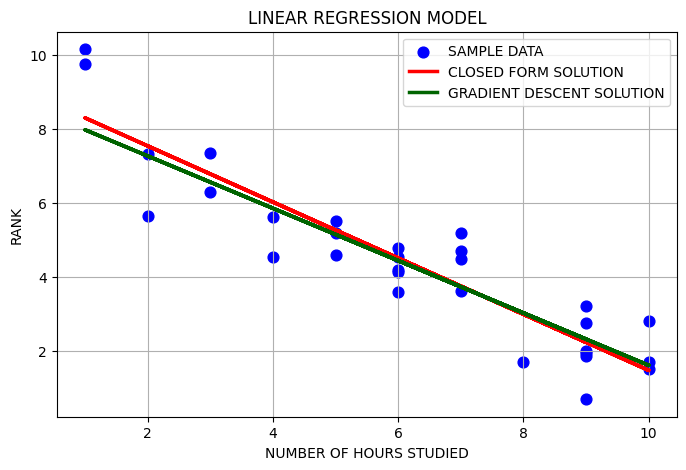


WEIGHTS FOR THE CLOSED FORM SOLUTION: [ 9.06136891 -0.75886584]
GRADIENT DESCENT WEIGHTS:  [ 8.68777329 -0.70790478]
DIFFERENCE: [0.37359561 0.05096106]

POLYNOMIAL COEFFICIENTS FOR 4TH DEGREE: [ 1.49626954e+01 -6.76055247e+00  1.81962106e+00 -2.17631510e-01
  9.02843449e-03]
4TH DEGREE POLYNOMIAL COEFFICIENTS: [ 1.49626954e+01 -6.76055247e+00  1.81962106e+00 -2.17631510e-01
  9.02843449e-03]
6TH DEGREE POLYNOMIAL COEFFICIENTS: [ 2.33971722e+01 -2.33451528e+01  1.30687063e+01 -3.74602540e+00
  5.67055633e-01 -4.31708698e-02  1.29779224e-03]
8TH DEGREE POLYNOMIAL COEFFICIENTS: [ 1.68401199e+01  3.60425562e-01 -1.87337228e+01  1.69794803e+01
 -6.78708807e+00  1.44832004e+00 -1.70983440e-01  1.05254829e-02
 -2.63570521e-04]
10TH DEGREE POLYNOMIAL COEFFICIENTS: [ 1.68397102e+01  3.68996232e-01 -1.87428907e+01  1.69840865e+01
 -6.78840322e+00  1.44854388e+00 -1.71005879e-01  1.05267043e-02
 -2.63598333e-04  5.99049365e-15  1.33119784e-16]
12TH DEGREE POLYNOMIAL COEFFICIENTS: [ 2.33970958e+

<ipython-input-5-ced0586f4da9>:28: RuntimeWarning: overflow encountered in square
  MSE = np.mean((y - predictions) ** 2)
<ipython-input-5-ced0586f4da9>:30: RuntimeWarning: invalid value encountered in scalar subtract
  if iteration > 0 and abs(errors[-1] - errors[-2]) <= tolerance:
<ipython-input-5-ced0586f4da9>:27: RuntimeWarning: overflow encountered in matmul
  weights = weights - learningrate * -2/n * X.transpose() @ (y - predictions)
<ipython-input-5-ced0586f4da9>:26: RuntimeWarning: overflow encountered in matmul
  predictions = X @ weights
<ipython-input-5-ced0586f4da9>:27: RuntimeWarning: invalid value encountered in subtract
  weights = weights - learningrate * -2/n * X.transpose() @ (y - predictions)


14TH DEGREE POLYNOMIAL COEFFICIENTS: [ 1.49655268e+01 -6.76476911e+00  1.82149215e+00 -2.17951447e-01
  9.04745080e-03 -2.24836198e-08 -2.41142830e-09 -2.52396199e-10
 -2.55412566e-11 -2.46457774e-12 -2.21903357e-13 -1.79745600e-14
 -1.22391425e-15 -6.04201338e-17 -1.39761018e-18]
16TH DEGREE POLYNOMIAL COEFFICIENTS: [ 9.99523935e+00 -1.18336203e+00  3.73417351e-02 -9.86535594e-06
 -1.05626060e-06 -1.12039882e-07 -1.17220118e-08 -1.20134176e-09
 -1.19230090e-10 -1.12214596e-11 -9.57672974e-13 -6.52250180e-14
 -1.44005546e-15  6.37569651e-16  1.73554321e-16  3.03001423e-17
  3.44042511e-18]


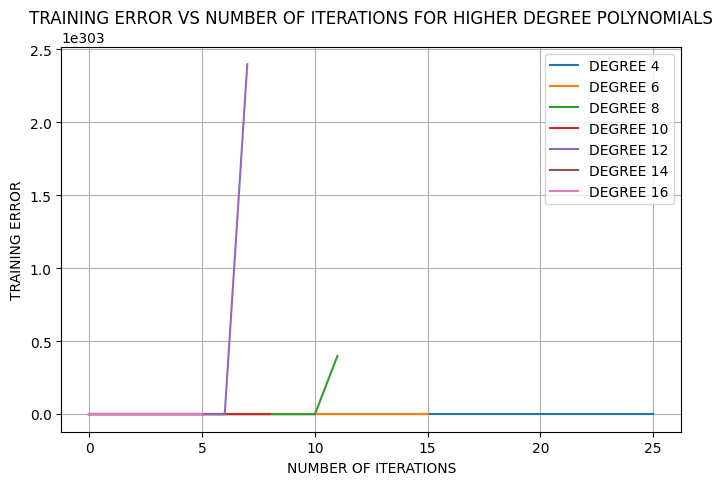

In [5]:
import numpy as np
import matplotlib.pyplot as plt

samples = 30

hours = np.random.randint(1, 11, samples)
rank = 10 - 0.9 * hours + np.random.normal(0, 1, samples)

X = hours.reshape(-1, 1)
y = rank

X_bias = np.c_[np.ones((X.shape[0], 1)), X]

def weight(X, y):
    weights = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y
    return weights

def prediction(X, weights):
    return X @ weights

def GD(X, y, learningrate=0.02, iterations=1000, tolerance=1e-8):
    n = len(X)
    weights = np.zeros(X.shape[1])
    errors = []
    for iteration in range(iterations):
        predictions = X @ weights
        weights = weights - learningrate * -2/n * X.transpose() @ (y - predictions)
        MSE = np.mean((y - predictions) ** 2)
        errors.append(MSE)
        if iteration > 0 and abs(errors[-1] - errors[-2]) <= tolerance:
            break
    return weights, errors

closed_form_W = weight(X_bias, y)
print("WEIGHTS FOR THE CLOSED FORM SOLUTION ARE (w0, w1): ", closed_form_W)
predictions_closed_form = prediction(X_bias, closed_form_W)

weights_gd, training_errors = GD(X_bias, y, learningrate=0.01, iterations=1000)
print("WEIGHTS FOR THE GRADIENT DESCENT ALGORITHM ARE (w0, w1): ", weights_gd)
predictions_gd = prediction(X_bias, weights_gd)

plt.figure(figsize=(8,5))
plt.plot(training_errors, label="TRAINING ERROR FOR GRADIENT DESCENT", color='GREEN', linewidth=3)
plt.title("GRADIENT DESCENT - TRAINING ERROR VS NUMBER OF EPOCS")
plt.ylabel("TRAINING ERROR")
plt.xlabel("NUMBER OF EPOCHS")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='BLUE', label="SAMPLE DATA", s=60)
plt.title("LINEAR REGRESSION MODEL")
plt.plot(X, predictions_closed_form, label="CLOSED FORM SOLUTION", color='RED', linewidth=2.5)
plt.plot(X, predictions_gd, label="GRADIENT DESCENT SOLUTION", color='DARKGREEN', linewidth=2.5)
plt.xlabel("NUMBER OF HOURS STUDIED")
plt.ylabel("RANK")
plt.grid(True)
plt.legend()
plt.show()

print("\nWEIGHTS FOR THE CLOSED FORM SOLUTION:", closed_form_W)
print("GRADIENT DESCENT WEIGHTS: ", weights_gd)
print(f"DIFFERENCE: {np.abs(closed_form_W - weights_gd)}")

def polynomial(X, degree):
    return np.hstack([X**i for i in range(degree + 1)])

degree = 4
X_4 = polynomial(X, degree)
weights_4 = weight(X_4, y)
print(f"\nPOLYNOMIAL COEFFICIENTS FOR 4TH DEGREE: {weights_4}")

degrees = [4, 6, 8, 10, 12, 14, 16]
training_errors = {}
plt.figure(figsize=(8,5))

for degree in degrees:
    X_poly = polynomial(X, degree)
    weights_poly = weight(X_poly, y)
    weights_gd_poly, errors = GD(X_poly, y)
    training_errors[degree] = errors
    print(f"{degree}TH DEGREE POLYNOMIAL COEFFICIENTS: {weights_poly}")
    plt.plot(errors, label=f"DEGREE {degree}")

plt.title("TRAINING ERROR VS NUMBER OF ITERATIONS FOR HIGHER DEGREE POLYNOMIALS")
plt.xlabel("NUMBER OF ITERATIONS")
plt.ylabel("TRAINING ERROR")
plt.legend()
plt.grid(True)
plt.show()
